In [275]:
import pandas as pd

abe_survey = pd.read_excel('ABE Career Outcomes Data 2016-2021.xlsx')

In [277]:
competencies = pd.read_excel('competencies.xlsx')
abe_comp = competencies[competencies['Major']=='Engineering'].drop(['Option(s)', 'Major'], axis=1)

In [278]:
abe_survey['Organization Name'].value_counts()

John Deere                      18
Vermeer Corporation             12
Cargill, Incorporated            8
Kuhn North America, Inc.         5
Henning Companies LLC            5
                                ..
Toyne Inc.                       1
Puck Custom Enterprises          1
Renewable Energy Group (REG)     1
WSP                              1
Universal Industries, Inc.       1
Name: Organization Name, Length: 100, dtype: int64

In [216]:
bse = abe_survey[abe_survey['Major 1 at Graduation'] == 'Biological Systems Engineering']
ag = abe_survey[abe_survey['Major 1 at Graduation'] == 'Agricultural Engineering']
print('TOP 10 EMPLOYERS FOR BSE AND AE \n \nBSE Common Employers:\n',bse['Organization Name'].value_counts().nlargest(10))
print('AE Common Employers: \n', ag['Organization Name'].value_counts().nlargest(10))
abe = pd.concat([bse['Organization Name'],ag['Organization Name']], axis=0)
abe = abe_survey['Organization Name']
abe = abe.dropna(axis=0)
abe = abe.unique()
abe = pd.DataFrame(abe, columns=['Employer'])
display(abe)

TOP 10 EMPLOYERS FOR BSE AND AE 
 
BSE Common Employers:
 Cargill, Incorporated                                                                                        6
ISG                                                                                                          2
John Deere                                                                                                   2
Ardent Mills                                                                                                 2
PepsiCo                                                                                                      2
ADM                                                                                                          2
Koch Industries Companies (Georgia-Pacific, Molex, Guardian Industries, Flint Hills Resources, & INVISTA)    1
Ajinomoto North America, Inc                                                                                 1
Tate & Lyle                                           

,Employer
0,Double L Group
1,John Deere
2,Kent Corporation
3,Syngenta
4,"Cargill, Incorporated"
...,...
95,United States Department of Agriculture
96,3M
97,"Frito-Lay, Inc."
98,"JEO Consulting Group, Inc."


In [282]:
# Next, I isolated the most common job titles that ABE graduates have. 
# I selected all job titles that at least 2 people acquired upon graduation. 
bse_job = bse['Job Title'].value_counts().nlargest(4).to_frame()
ag_job = ag['Job Title'].value_counts().nlargest(17).to_frame()
bse_joblist = bse_job.index
ag_joblist = ag_job.index

In [17]:
## ***************************
# huge thank you to Ryan Jeon for developing the base of this indeed text scraping code
# see supplemental information for the source code created by him, it has been modified slightly for this application
from bs4 import BeautifulSoup
import requests

headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
df = pd.DataFrame(columns = ["Job_Titles"])
df2 = pd.DataFrame(columns = ["Company"])
df3 = pd.DataFrame(columns = ["URL"])


r = requests.get('https://www.indeed.com/jobs?q=agricultural%20engineer&start=10'.format(0), headers = headers)
soup = BeautifulSoup(r.text, 'html.parser')
titles = soup.select("h2 span") 
# select all span tags under the umbrella of h2 tags 
companies = soup.find_all(class_ = "companyName")
URLs = soup.find_all('a', attrs = {'class' : 'tapItem'})

for title in titles:
    titles_list = title.text
    # the gotcha here is that there are "news" scattered so we have to remove those first before concatenating our data
    df.loc[len(df.index)] = [titles_list]
    df = df[df.Job_Titles != "new"]

for company in companies:
    company_list = company.text
    df2.loc[len(df2.index)] = [company_list]

for URL in URLs:
    base = 'http://www.indeed.com'
    link = URL.attrs['href']
    new_URL = base + link
    df3.loc[len(df3.index)] = [new_URL]    
    
indeed = pd.concat([df, df2, df3], axis=1, join='inner')
display(df)
display(indeed)
## *************** end of code edited from Ryan Jeon's amazing work! :)

,Job_Titles


,Job_Titles,Company,URL


In [77]:
def indeed_posts(search_term):

    kw = search_term.split(" ")
 #   search_url = 'https://www.indeed.com/jobs?q='
 #   for word in range(0,len(kw)-1):
 #       search_url = search_url + kw[word] + '%20'
 #   search_url = search_url + kw[len(kw)-1] + '&start={' + pagenumber + '}'
    ## *************************** a huge thank you to Ryan Jeon for developing the base of this indeed text scraping code
    # see supplemental information for the source code created by him, it has been modified slightly for this application
    from bs4 import BeautifulSoup
    import requests
    import time
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'}
    df = pd.DataFrame(columns = ["Job_Titles"])
    df2 = pd.DataFrame(columns = ["Company"])
    df3 = pd.DataFrame(columns = ["URL"])
    sind = f'https://www.indeed.com/jobs?as_and='
    kword = '&as_phr&as_any=biological%2C%20agriculture%2C%20food%2C%20environment%2C%20biofuel%2C%20fermentation%2C%20water%2C%20machinery%2C%20animal'
    end = '&as_not&as_ttl&as_cmp&jt=all&st&salary&radius=25&l&fromage=any&limit=10&sort&psf=advsrch&from=advancedsearch&vjk=ffced369343eb245'
    # key words to look for in job title/description to get closer to the industry students join
    for pagenum in range(0,30,10):
        for word in range(0,len(kw)-1):
            search_url = sind + kw[word] + '%20'
        search_url = search_url + kw[len(kw)-1] + kword + end+'%20&start=' + str(pagenum)
        r = requests.get(search_url, headers = headers)
        time.sleep(1)
        soup = BeautifulSoup(r.text, 'html.parser')
        titles = soup.select("h2 span") 
        # select all span tags under the umbrella of h2 tags 
        companies = soup.find_all(class_ = "companyName")
        URLs = soup.find_all('a', attrs = {'class' : 'tapItem'})
        for title in titles:
            titles_list = title.text
            # the gotcha here is that there are "news" scattered so we have to remove those first before concatenating our data
            df.loc[len(df.index)] = [titles_list]
            df = df[df.Job_Titles != "new"]
        for company in companies:
            company_list = company.text
            df2.loc[len(df2.index)] = [company_list]
        for URL in URLs:
            base = 'http://www.indeed.com'
            link = URL.attrs['href']
            new_URL = base + link
            df3.loc[len(df3.index)] = [new_URL]    
        ## *************************** end of code edited from Ryan Jeon's amazing work! :)

    jdesc =  pd.DataFrame(columns = ["Job Description"])

    for post in df3['URL']:
        r = requests.get(post.format(0), headers = headers)
        soup = BeautifulSoup(r.text, 'html.parser')
        time.sleep(1)
        job_description = soup.find('div',{'id':'jobDescriptionText'})
        jd = job_description.text if job_description else "N/A"
        jdesc.loc[len(jdesc.index)] = [jd.replace('\n', ' ')]   
    indeed = pd.concat([df, df2, df3, jdesc], axis=1, join='inner')
    return indeed

In [76]:
y = indeed_posts('Project Engineer')
display(y)

https://www.indeed.com/jobs?as_and=Project%20Engineer&as_phr&as_any=biological%2C%20agriculture%2C%20food%2C%20environment%2C%20biofuel%2C%20fermentation%2C%20water%2C%20machinery%2C%20animal&as_not&as_ttl&as_cmp&jt=all&st&salary&radius=25&l&fromage=any&limit=10&sort&psf=advsrch&from=advancedsearch&vjk=ffced369343eb245%20&start=0
https://www.indeed.com/jobs?as_and=Project%20Engineer&as_phr&as_any=biological%2C%20agriculture%2C%20food%2C%20environment%2C%20biofuel%2C%20fermentation%2C%20water%2C%20machinery%2C%20animal&as_not&as_ttl&as_cmp&jt=all&st&salary&radius=25&l&fromage=any&limit=10&sort&psf=advsrch&from=advancedsearch&vjk=ffced369343eb245%20&start=10
https://www.indeed.com/jobs?as_and=Project%20Engineer&as_phr&as_any=biological%2C%20agriculture%2C%20food%2C%20environment%2C%20biofuel%2C%20fermentation%2C%20water%2C%20machinery%2C%20animal&as_not&as_ttl&as_cmp&jt=all&st&salary&radius=25&l&fromage=any&limit=10&sort&psf=advsrch&from=advancedsearch&vjk=ffced369343eb245%20&start=20
ht

,Job_Titles
0,Project Engineer II
1,MECHICAL ENGINEER (NO EXPERIENCE)
2,Mechanical Designer / Engineer-Work Remotely!
3,MECHANICAL ENGINEER (NO EXPERIENCE)
4,Project Engineer
...,...
85,Research & Development Design Engineer
86,Water Resource Engineer
87,Engineer Assistant
88,Project Engineer - Food & Beverage Process


,Job_Titles,Company,URL,Job Description
0,Project Engineer II,Cargill,http://www.indeed.com/rc/clk?jk=ffced369343eb2...,"Want to build a stronger, more sustainable fut..."
1,MECHICAL ENGINEER (NO EXPERIENCE),CEMEX USA,http://www.indeed.com/company/CEMEX-USA/jobs/M...,"Company OverviewFounded in 1906, over the last..."
2,Mechanical Designer / Engineer-Work Remotely!,SSI Consulting,http://www.indeed.com/company/SSI-Consulting/j...,We are seeking mechanical designers and / or e...
3,MECHANICAL ENGINEER (NO EXPERIENCE),CEMEX USA,http://www.indeed.com/company/CEMEX-USA/jobs/M...,"Company OverviewFounded in 1906, over the last..."
4,Project Engineer,Jackson Dean Construction,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Project EngineerJackson Dean Construction has ...
...,...,...,...,...
85,Research & Development Design Engineer,Johnson & Johnson Family of Companies,http://www.indeed.com/rc/clk?jk=4fe8b85c9e4b55...,"Ethicon Endo Surgery Inc., a member of Johnson..."
86,Water Resource Engineer,Colorado Springs Utilities,http://www.indeed.com/rc/clk?jk=27732ed09af3f0...,Job Type: Engineering/Engineering Support Pay ...
87,Engineer Assistant,"City of La Vista, NE",http://www.indeed.com/rc/clk?jk=ae4b20b3600ade...,Applications for a full-time Engineer Assistan...
88,Project Engineer - Food & Beverage Process,Stellar Group,http://www.indeed.com/rc/clk?jk=874b91788294a4...,Overview: Stellar is seeking a Food & Beverag...


In [220]:
# add major job category column based on official job title
y['Job Description']

0     Want to build a stronger, more sustainable fut...
1     Company OverviewFounded in 1906, over the last...
2     We are seeking mechanical designers and / or e...
3     Company OverviewFounded in 1906, over the last...
4     Project EngineerJackson Dean Construction has ...
                            ...                        
85    Ethicon Endo Surgery Inc., a member of Johnson...
86    Job Type: Engineering/Engineering Support Pay ...
87    Applications for a full-time Engineer Assistan...
88    Overview:  Stellar is seeking a Food & Beverag...
89    RFA Engineering (www.rfamec.com) is seeking a ...
Name: Job Description, Length: 90, dtype: object

In [283]:
from collections import Counter
Counter(" ".join(y['Job Description']).split()).most_common(5)

[('and', 3021), ('to', 1648), ('the', 1437), ('of', 1301), ('in', 894)]

In [223]:
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def clean_post(text):
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords])
    
    return text

In [224]:
posts = y['Job Description'].tolist()
clean_posts = list(map(clean_post, posts))
vectorizer = CountVectorizer().fit_transform(clean_posts)
vectors = vectorizer.toarray()
csim = cosine_similarity(vectors)

In [225]:
from collections import Counter

word_count =Counter(" ".join(clean_posts).split()).most_common(20)
word_count

[('engineering', 424),
 ('work', 345),
 ('experience', 315),
 ('design', 247),
 ('project', 234),
 ('engineer', 189),
 ('projects', 188),
 ('required', 146),
 ('including', 144),
 ('development', 141),
 ('team', 140),
 ('position', 136),
 ('skills', 133),
 ('technical', 131),
 ('may', 127),
 ('ability', 124),
 ('us', 119),
 ('must', 119),
 ('systems', 116),
 ('support', 112)]

In [284]:
abe_competencies = [' '.join(abe_comp['Outcome'])]
clean_abe_comp = [clean_post(abe_competencies)]
info = clean_abe_comp + clean_posts

In [285]:
vectorizer = CountVectorizer().fit_transform(info)
vectors = vectorizer.toarray()
csim = cosine_similarity(vectors)
csim[0]

array([1.        , 0.18422073, 0.06474772, 0.10024666, 0.06458504,
       0.06258457, 0.08410313, 0.11267485, 0.18654777, 0.24262361,
       0.21078208, 0.17607506, 0.06528679, 0.08105299, 0.28165238,
       0.1980042 , 0.19798632, 0.07091021, 0.07645403, 0.15426311,
       0.13724253, 0.20935814, 0.13396236, 0.16010009, 0.16533392,
       0.25615471, 0.14844687, 0.27964032, 0.13740172, 0.2495729 ,
       0.17743856, 0.14112142, 0.1759198 , 0.24039967, 0.17816909,
       0.15427651, 0.08723571, 0.15248204, 0.15280734, 0.158354  ,
       0.06734445, 0.12773812, 0.26037682, 0.22625708, 0.16881838,
       0.23738385, 0.10874225, 0.22344128, 0.21148863, 0.25416298,
       0.17377871, 0.11841497, 0.15725813, 0.15424714, 0.16836677,
       0.07645403, 0.13324477, 0.1183164 , 0.1647447 , 0.18127747,
       0.21786322, 0.11960929, 0.08179631, 0.2550891 , 0.19354275,
       0.19717872, 0.08105299, 0.34305614, 0.19828507, 0.15711838,
       0.14392357, 0.21744699, 0.18059795, 0.10884482, 0.17939

In [237]:
test = CountVectorizer()
# provide vocabulary to vectorizer based on competencies
vec = test.fit(clean_abe_comp)
print(vec.vocabulary_.keys())

dict_keys(['ability', 'identify', 'formulate', 'solve', 'complex', 'engineering', 'problems', 'applying', 'principles', 'science', 'mathematics', 'communicate', 'effectively', 'range', 'audiences', 'apply', 'design', 'produce', 'solutions', 'meet', 'specified', 'needs', 'consideration', 'public', 'health', 'safety', 'welfare', 'well', 'global', 'cultural', 'social', 'environmental', 'economic', 'factors', 'recognize', 'ethical', 'professional', 'responsibilities', 'situations', 'make', 'informed', 'judgments', 'must', 'consider', 'impact', 'societal', 'contexts', 'function', 'team', 'whose', 'members', 'together', 'provide', 'leadership', 'create', 'collaborative', 'inclusive', 'environment', 'establish', 'goals', 'plan', 'tasks', 'objectives', 'develop', 'conduct', 'appropriate', 'experimentation', 'analyze', 'interpret', 'data', 'use', 'judgment', 'draw', 'conclusions', 'acquire', 'new', 'knowledge', 'needed', 'using', 'learning', 'strategies'])


In [238]:
# identify counts of vocabulary from competencies
job_fit = test.transform(clean_posts)

In [239]:
sim = job_fit.toarray()

In [286]:
sim.shape

(90, 81)

In [243]:
jsim = cosine_similarity(sim)
# this is just similarity between posts, not to comp

In [244]:
jsim

array([[1.        , 0.30194054, 0.34426519, ..., 0.26069143, 0.45020003,
        0.44248489],
       [0.30194054, 1.        , 0.0877058 , ..., 0.15626908, 0.20853456,
        0.21862494],
       [0.34426519, 0.0877058 , 1.        , ..., 0.10096536, 0.63404262,
        0.2388845 ],
       ...,
       [0.26069143, 0.15626908, 0.10096536, ..., 1.        , 0.31914029,
        0.58570451],
       [0.45020003, 0.20853456, 0.63404262, ..., 0.31914029, 1.        ,
        0.63713221],
       [0.44248489, 0.21862494, 0.2388845 , ..., 0.58570451, 0.63713221,
        1.        ]])

<AxesSubplot:>

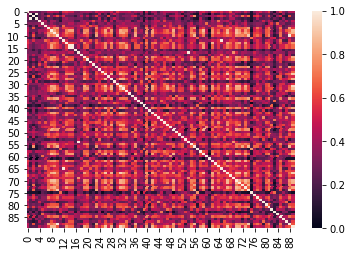

In [245]:
import seaborn as sns

sns.heatmap(jsim)

In [302]:
tfidf_v = TfidfVectorizer()
vocab = tfidf_v.fit(clean_abe_comp)
job_assess = tfidf_v.transform(clean_posts)
#job_fit = tfidf_v.inverse_transform(job_assess)
prepared = job_assess[0]
df = pd.DataFrame(prepared.T.todense(), index = tfidf_v.get_feature_names(), columns = ['tfidf']) 
df.sort_values(by=['tfidf'], ascending= False).head()

,tfidf
engineering,0.38490
complex,0.38490
develop,0.38490
apply,0.19245
establish,0.19245


In [303]:
job_assess = job_assess.toarray()

In [ ]:
# identify common skills from each job, each job make common requirements & skills (1 list per job search term)

#use tfidf vector for cosine similarity, heatmap w/ competencies